In [1]:
from Operations import Distort, RotateRange
from PIL import Image
import glob, os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from test_ffdnet_ipol import test_ffdnet
import torch

In [2]:
distortor = Distort(0.99,2,2,2)

In [3]:
rotator = RotateRange(0.99,2,2)

In [4]:
def rotate(img):
    pilimg = Image.fromarray(img)
    pilimg = rotator.perform_operation(pilimg) 
    img = np.array(pilimg)
    return img

In [5]:
def distort(img):
    pilimg = Image.fromarray(img) 
    pilimg = distortor.perform_operation(pilimg)
    img = np.array(pilimg)
    return img

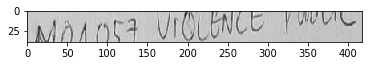

In [6]:
# im = Image.open("/home/demo/Desktop/handwriting/temp/data/lines_2/401/401_0.jpg")
im = cv2.imread('/home/demo/Desktop/handwriting/temp/data/lines_2/401/401_0.jpg')

# cv2.imshow('image',rotate(rotator, im))
plt.imshow(rotate(im))

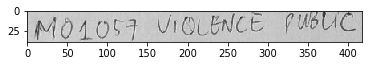

In [7]:
plt.imshow(im)

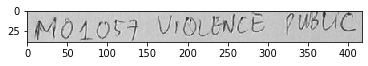

In [8]:
plt.imshow(distort(im))

In [9]:
f = open('/home/demo/Desktop/handwriting/temp/data/anno-train.txt', 'r')
anotation_train_label = f.read()

In [10]:
anotation_array = anotation_train_label.split('\n')
array = []
for line in anotation_array:
    if len(line) !=0:
        temp1 = line.split('^')
        file = temp1[0]
        label = temp1[1]
        folder, index = file.split('_')
        array.append([folder, index.split('.')[0], file, label])

In [11]:
print(array)

[['451', '0', '451_0.jpg', 'Cancer CRUEL. Face FEELING'], ['451', '1', '451_1.jpg', 'ANONYMOUS ALONE ALL. CLINIC SKULL'], ['451', '2', '451_2.jpg', 'VOLUME SOFT. BEGINNING MOREOVER'], ['451', '3', '451_3.jpg', 'STRESS JOKE EXISTING'], ['451', '4', '451_4.jpg', 'CHILD GUARD OVERNIGHT INFLUENTIAL'], ['451', '5', '451_5.jpg', 'GUILTY WHALE SIX'], ['451', '6', '451_6.jpg', 'excessive PALM cab rescue'], ['451', '7', '451_7.jpg', 'LIGHT LEADING. RUNNING RE RECEPTION'], ['451', '8', '451_8.jpg', 'GRADE REFORM. PAY VENDOR'], ['451', '9', '451_9.jpg', 'mixture: WARM, housing'], ['451', '10', '451_10.jpg', 'RECALL SOCIETY JACKET MAIN'], ['451', '11', '451_11.jpg', 'WINE CANADIAN. WAGE INTELLIGENCE'], ['451', '12', '451_12.jpg', '0457 27 05 STAR LUCKY SHARPLY'], ['451', '13', '451_13.jpg', 'ABOUT FUNDING COOL'], ['451', '14', '451_14.jpg', 'ISLAND 5708318'], ['451', '15', '451_15.jpg', 'T-SHIRT: LOCAL,'], ['451', '16', '451_16.jpg', 'LAND HABIT. MANUAL EXCEPT HUNGRY'], ['451', '17', '451_17.jpg',

In [12]:
def createFolder(dirName):
    if not os.path.exists(dirName):
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ")
    else:    
        print("Directory " , dirName ,  " already exists")   

In [13]:
path='/home/demo/Desktop/handwriting/temp/data/lines_2'
path_save = '/home/demo/Desktop/handwriting/temp/data/augmentation'
# # Create target Directory if don't exist
createFolder(path_save)
labelfile = open(os.path.join(path_save, 'anotaion-train.txt'),'w')
for line in array:
    p = os.path.join(path, line[0], line[2])
    im = cv2.imread(p)
    rotateImg = rotate(im)
    distortImg = distort(im)
    # save image
    dirName = os.path.join(path_save, line[0])
    createFolder(dirName)
    cv2.imwrite(os.path.join(dirName, line[2]), im)
    labelfile.write(line[2] + ' ' + line[3] + '\n')
    
    rotateFile = line[0] + '_' + line[1] + '_rotate.jpg'
    labelfile.write(rotateFile + ' ' + line[3] + '\n')
    cv2.imwrite(os.path.join(dirName, rotateFile), rotateImg)
    
    distortFile = line[0] + '_' + line[1]+'_distort.jpg'
    labelfile.write(distortFile + ' ' + line[3] + '\n')
    cv2.imwrite(os.path.join(dirName, distortFile), distortImg)
    
    denoisingFile = line[0] + '_' + line[1] + '_denosing.jpg'
    labelfile.write(denoisingFile + ' ' + line[3] + '\n')
    test_ffdnet(input=p, 
            noise_sigma=25/255, 
            add_noise=False, 
            no_gpu=False, 
            dont_save_results=False, 
            output=os.path.join(dirName, denoisingFile),
            cuda=torch.cuda.is_available())

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation  Created 
Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  Created 
rgb: False
im shape: (54, 562)
Loading model ...



/home/demo/Desktop/handwriting/jupyter/test_ffdnet_ipol.py:110: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  imorig, imnoisy = Variable(imorig.type(dtype), volatile=True), \
/home/demo/Desktop/handwriting/jupyter/test_ffdnet_ipol.py:111: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  Variable(imnoisy.type(dtype), volatile=True)
/home/demo/Desktop/handwriting/jupyter/test_ffdnet_ipol.py:114: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  volatile=True)
/home/demo/Desktop/handwriting/jupyter/models.py:100: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  concat_noise_x = Variable(concat_noise_x, volatile=True)


Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 563)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 563)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 563)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 564)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 564)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 565)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/451  already exists
rgb: False
im shape: (54, 565)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 553)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/410  already exists
rgb: False
im shape: (51, 551)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (50, 548)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (52, 547)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (52, 547)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (52, 547)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (50, 548)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (50, 547)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/405  already exists
rgb: False
im shape: (50, 547)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/411  already exists
rgb: False
im shape: (51, 543)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/423  already exists
rgb: False
im shape: (52, 573)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/423  already exists
rgb: False
im shape: (52, 573)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/423  already exists
rgb: False
im shape: (52, 573)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/423  already exists
rgb: False
im shape: (55, 573)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/415  Created 
rgb: False
im shape: (52, 559)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/415  already exists
rgb: False
im shape: (52, 560)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/415  already exists
rgb: False
im shape: (52, 560)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentat

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (52, 580)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (52, 579)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (52, 579)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (52, 578)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (52, 578)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (56, 576)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/418  already exists
rgb: False
im shape: (52, 576)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (44, 436, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (34, 540, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (36, 228, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (40, 389, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (34, 536, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (34, 198, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/402  already exists
rgb: False
im shape: (32, 370, 3)
Loading model ...

Directory  /home/demo/Desktop/hand

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  Created 
rgb: False
im shape: (51, 560)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  already exists
rgb: False
im shape: (51, 561)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  already exists
rgb: False
im shape: (51, 561)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  already exists
rgb: False
im shape: (51, 562)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  already exists
rgb: False
im shape: (51, 562)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  already exists
rgb: False
im shape: (51, 562)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/414  already exists
rgb: False
im shape: (51, 562)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentat

rgb: False
im shape: (50, 558)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 559)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 558)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 558)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 557)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 557)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 557)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/413  already exists
rgb: False
im shape: (50, 557)
Loading model ...

Direc

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 555)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 555)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 555)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 555)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 556)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 556)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/408  already exists
rgb: False
im shape: (52, 556)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/407  already exists
rgb: False
im shape: (52, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/407  already exists
rgb: False
im shape: (52, 551)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/407  already exists
rgb: False
im shape: (52, 550)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/437  Created 
rgb: False
im shape: (52, 556)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/437  already exists
rgb: False
im shape: (52, 557)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/437  already exists
rgb: False
im shape: (52, 556)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/437  already exists
rgb: False
im shape: (52, 556)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentat

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (49, 522)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (49, 522)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (49, 522)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (49, 522)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (49, 521)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (49, 521)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/428  already exists
rgb: False
im shape: (46, 521)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (52, 576)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (56, 576)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (56, 577)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (56, 577)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (56, 578)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (56, 578)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/419  already exists
rgb: False
im shape: (56, 579)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/aug

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/412  already exists
rgb: False
im shape: (50, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/412  already exists
rgb: False
im shape: (50, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/412  already exists
rgb: False
im shape: (50, 552)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/424  Created 
rgb: False
im shape: (51, 557)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/424  already exists
rgb: False
im shape: (51, 557)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/424  already exists
rgb: False
im shape: (54, 559)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/424  already exists
rgb: False
im shape: (54, 558)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentat

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (51, 564)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (51, 563)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (54, 563)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (54, 562)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (39, 358, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (40, 426, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp/data/augmentation/401  already exists
rgb: False
im shape: (39, 396, 3)
Loading model ...

Directory  /home/demo/Desktop/handwriting/temp